In [5]:
import scikitplot as skplt
import pandas as pd 

from time import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./data/authority_dataset.csv')
df

,ad,auth
0,north korea officially has no corona cases how...,1
1,it seems difficult to stand for something one ...,0
2,senator bernie sanders held a rally with randy...,1
3,life gets busy—don’t wait to send back your ba...,0
4,some issues feel impossible to compromise on b...,1
...,...,...
49661,a recent poll shows sherrod with just a one po...,0
49662,today’s donor goal ⃣ ⃣ ⃣ our endofquarter dead...,0
49663,you’ve been selected after a year of chaos hat...,1
49664,after receiving the corona vaccine a video tha...,0


In [29]:
X_train, X_test, y_train, y_test  = train_test_split(df['ad'], df['auth'], test_size = 0.33, random_state=42)

In [30]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [31]:
# create and train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tf , y_train)

MultinomialNB()

accuracy:   0.819
              precision    recall  f1-score   support

no-authority       0.93      0.69      0.79      8190
   authority       0.75      0.95      0.84      8200

    accuracy                           0.82     16390
   macro avg       0.84      0.82      0.82     16390
weighted avg       0.84      0.82      0.82     16390

confusion matrix:
[[5651 2539]
 [ 423 7777]]



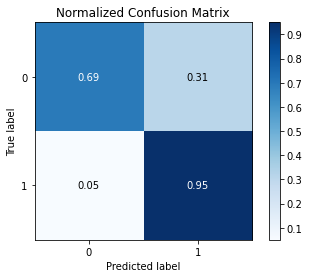

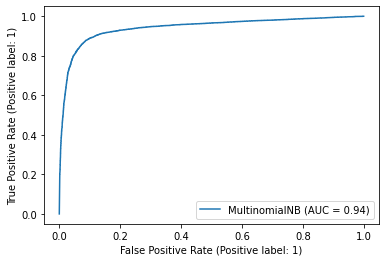

In [32]:
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['no-authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [33]:
df_val = pd.read_csv('./data/validation_dataset.csv')
df_val

,ad,auth
0,please share in order to do well in the precin...,1
1,for far too long many in this country have pro...,0
2,todco proposed “housing first” central soma pl...,1
3,the latest census bureau data confirms women a...,0
4,did you think we were done organizing just bec...,0
...,...,...
17294,the way this green party candidate is getting ...,0
17295,on your votes projects are proposed to the vot...,0
17296,bbq campaign kickoff as we get ready to run fo...,1
17297,the white house chief of staff is the latest v...,1


In [34]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['auth']

accuracy:   0.820
              precision    recall  f1-score   support

     no-auth       0.93      0.69      0.79      8649
        auth       0.76      0.95      0.84      8650

    accuracy                           0.82     17299
   macro avg       0.84      0.82      0.82     17299
weighted avg       0.84      0.82      0.82     17299

confusion matrix:
[[5991 2658]
 [ 459 8191]]



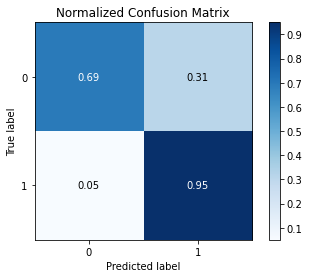

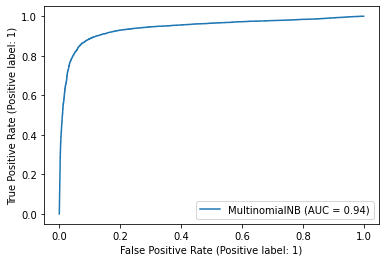

In [36]:
y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-auth', 'auth']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)

In [46]:
df_val = pd.read_csv('./data/sample_auth.csv')
df_val

,ad,authority
0,the european youth event is back in strasbourg...,1
1,learn the greatest tips tricks from the world...,1
2,live women leaders discuss how to accelerateeq...,1
3,if you love motorsport but work in another ind...,0
4,together we can turn the tide to protect our p...,0
...,...,...
103,it takes courage to take control of our life a...,0
104,experts from waseda university are advising ja...,1
105,a team of investigators from the rush universi...,1
106,you should recycle your jeansin the 4th episod...,1


accuracy:   0.787
              precision    recall  f1-score   support

no authority       0.84      0.70      0.77        54
   authority       0.75      0.87      0.80        54

    accuracy                           0.79       108
   macro avg       0.80      0.79      0.79       108
weighted avg       0.80      0.79      0.79       108

confusion matrix:
[[38 16]
 [ 7 47]]



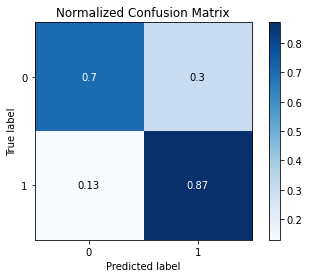

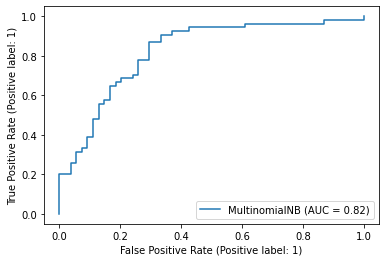

In [48]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['authority']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)